In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 300)

# visualizations
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [5]:
data = pd.read_csv(r"D:\Repositories\Git_GitHub\data-science-track\data-science-track\03-machine-learning\resources\data_preprocessing_1\boston_housing_prices.csv")
# This is where you can find the data
# https://www.kaggle.com/datasets/camnugent/california-housing-prices

print(data.shape)
data.head()

(506, 15)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis (EDA)

## Variable Identification

In [ ]:
data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



We only have one categorical feature. Let's see what its levels are.

## Train-test-split

In [6]:
train, test = train_test_split(data,
                               test_size=0.15,
                               random_state=37
                               )

print(train.shape)
print(test.shape)
print('\n')


(430, 15)
(76, 15)




## NA Analysis

In [7]:
display(train.isna().sum())
print("\n")
display(test.isna().sum())

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

## Check for duplicated rows

In [8]:
print(train.shape)
print(train.drop_duplicates().shape)

print(test.shape)
print(test.drop_duplicates().shape)

(430, 15)
(430, 15)
(76, 15)
(76, 15)


There are no duplicated rows.



## Univariate Analysis

We have 9 numerical features (one is the target variable, median_house_value) and 1 categorical feature.

In [9]:
num_features = [el for el in train.columns if el not in 'PRICE']
num_features

['Unnamed: 0',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

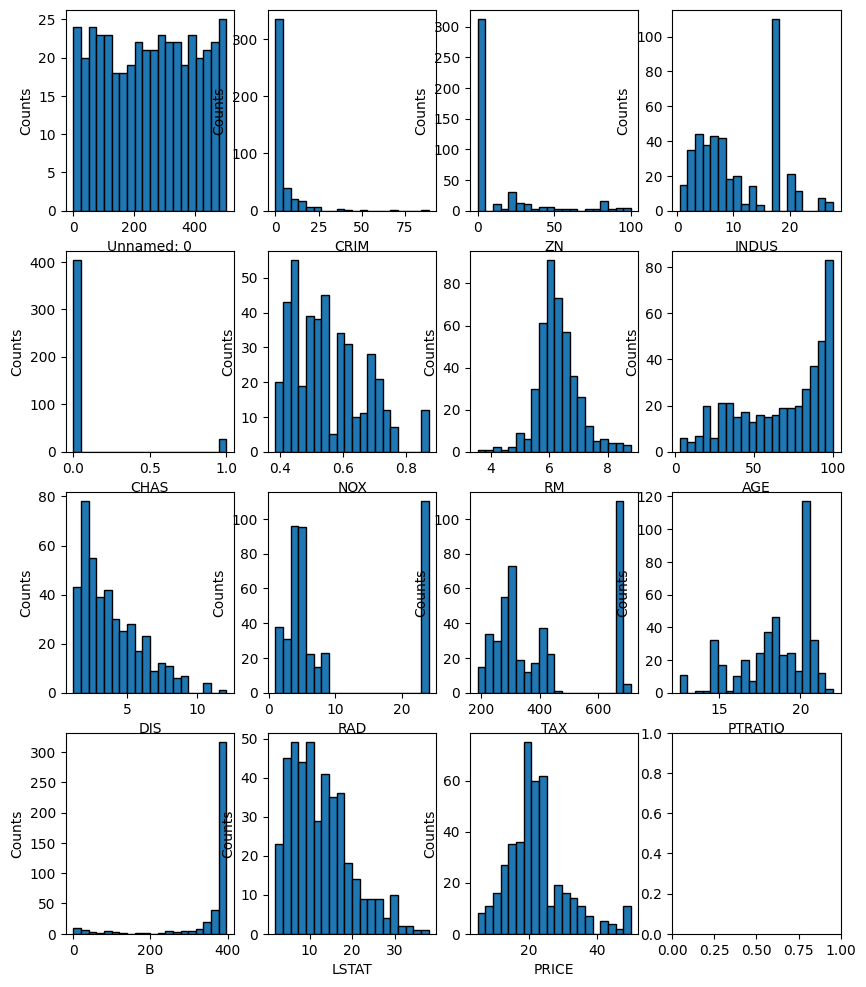

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(10, 12))
axs = axs.flatten()

# Plot histograms for each column
for i, col in enumerate(num_features + ['PRICE']):
    axs[i].hist(train[col], bins=20, edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Counts')


## Bivariate Analysis

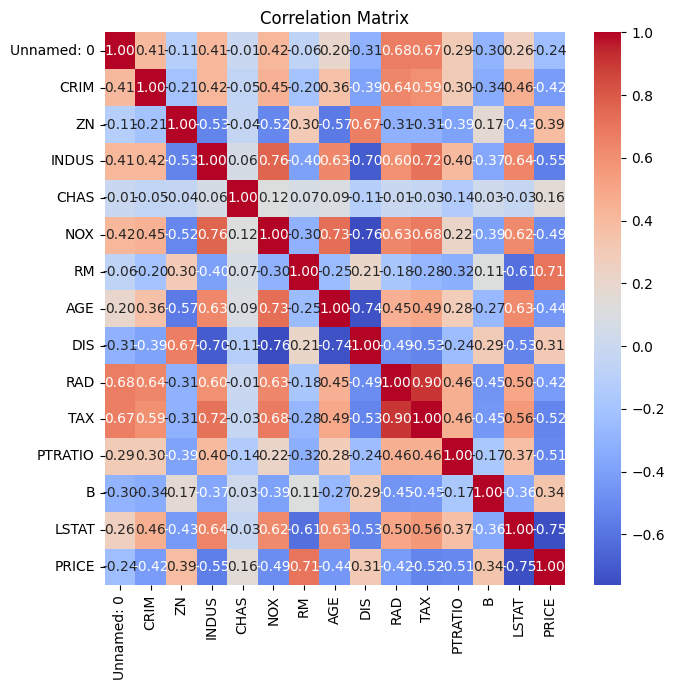

In [ ]:
def plotCorrelationMatrix(df, figsize=(5, 5)):

    corr = df.corr()

    plt.figure(figsize=figsize)

    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

    plt.title('Correlation Matrix')
    plt.tight_layout()

    plt.show()

plotCorrelationMatrix(train[num_features+['PRICE']], figsize=(7, 7))

**Observations**

1. median_house_value, our target variable, has the strongest correlationship with median_income. It means, people with higher income typically have more expensive houses which completely makes sense.

2. Also, there is such a strong relationship between total_rooms, total_bedrooms, population and household in a block, which again makes sense.

3. After median_income, total_rooms and housing_median_age have the highest correlation with the median_house_value.

4. Latitude seems to have a negative correlation with the median_house_value, which is also important.



> What can we do about the categorical feature? It is not easy to compute the correlation between a categorical feature such as ocean_proximity and our target variable "median_house_value" which is numerical.

First, we can draw some boxplots.


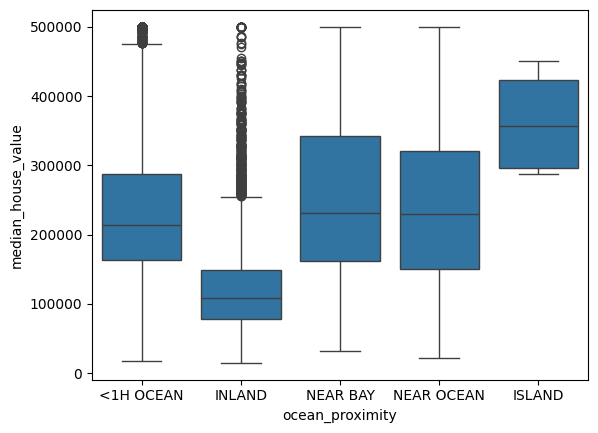

In [ ]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=train)
plt.show()

# Encoding Categorical Features

As we saw in the lecture, we can encode our categorical feature "ocean_proximity" as one-hot-encoded vectors.

In [ ]:
df_temp = pd.get_dummies(train[['ocean_proximity']], columns=['ocean_proximity'])
df_temp = df_temp.apply(lambda row: row.map({True: 1, False: 0}))
df_temp.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8571,1,0,0,0,0
13270,0,1,0,0,0
18485,0,1,0,0,0
743,0,0,0,1,0
18365,1,0,0,0,0


Now we drop the original column and concatenate the generate dataframe.

In [ ]:
train_encoded = train.drop(columns=['ocean_proximity'])
train_encoded = pd.concat([train_encoded, df_temp], axis=1) # axis=1 means to concatenate along columns
train_encoded.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8571,-118.40,33.90,37.0,2458.0,400.0,920.0,375.0,7.8924,500001.0,1,0,0,0,0
13270,-117.66,34.09,23.0,1426.0,313.0,954.0,319.0,3.0357,151500.0,0,1,0,0,0


In [ ]:
num_features = [el for el in train_encoded.columns if el != "median_house_value"]

Now this data is all numerical. Maybe we can one more time compute the correlations:

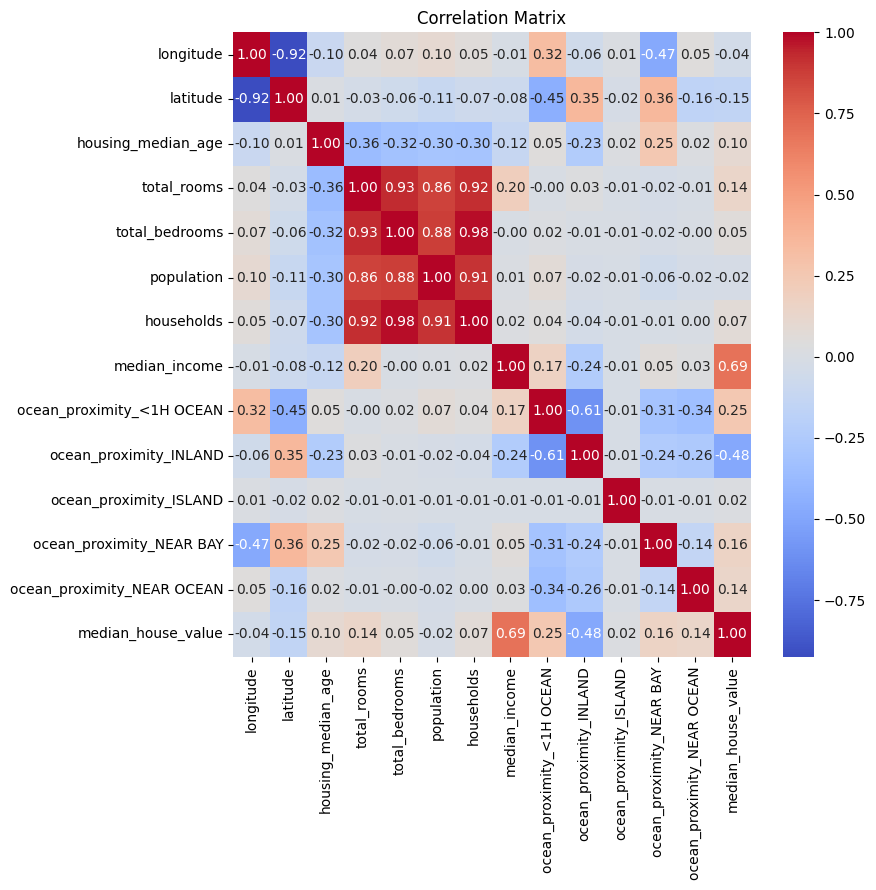

In [ ]:
plotCorrelationMatrix(train_encoded[num_features+["median_house_value"]], figsize=(9, 9))

# Preprocessing

Now that we better know our variables, and we also encoded the categorical feature, let us see how we preprocess our data before modelling.

We'll perform

1. missing value imputation

2. Encoding

3. Modelling (baseline)

4. Outlier handling

5. Modelling again (to see if outlier-handling brough about improvement)

In [ ]:
def preprocess(train, test):

  # missing values
  train['total_bedrooms'].fillna(train['total_bedrooms'].median(), inplace=True)
  test['total_bedrooms'].fillna(test['total_bedrooms'].median(), inplace=True)

  # encoding
  # for train
  df_temp = pd.get_dummies(train[['ocean_proximity']], columns=['ocean_proximity'])
  df_temp = df_temp.apply(lambda row: row.map({True: 1, False: 0}))
  train = train.drop(columns=['ocean_proximity'])
  train = pd.concat([train, df_temp], axis=1) # axis=1 means to concatenate along columns

  # for test
  df_temp = pd.get_dummies(test[['ocean_proximity']], columns=['ocean_proximity'])
  df_temp = df_temp.apply(lambda row: row.map({True: 1, False: 0}))
  test = test.drop(columns=['ocean_proximity'])
  test = pd.concat([test, df_temp], axis=1)

  return train, test


train_encoded, test_encoded = preprocess(train.copy(), test.copy())
# Note: It is important to pass on the copys of the dataframes in such operations
# The reason is pandas saves dataframe in the same memory location, and any
# operation on the dataframe will also change the original dataframe, which we
# don't want to happen. Be very careful with such steps.

print("train_encoded shape: ", train_encoded.shape)
print("test_encoded shape: ", test_encoded.shape)

train_encoded shape:  (17544, 14)
test_encoded shape:  (3096, 14)


<ipython-input-20-5807b3c46a80>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['total_bedrooms'].fillna(train['total_bedrooms'].median(), inplace=True)
<ipython-input-20-5807b3c46a80>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
train_encoded.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8571,-118.4,33.9,37.0,2458.0,400.0,920.0,375.0,7.8924,500001.0,1,0,0,0,0


# Fit a model

In [ ]:
def get_model_inputs(train_encoded, test_encoded):
  target_feature = 'median_house_value'
  features = [el for el in train_encoded.columns if el!=target_feature]
  X_train = train_encoded[features].values
  y_train = train_encoded[target_feature].values
  X_test = test_encoded[features].values
  y_test = test_encoded[target_feature].values

  return X_train, y_train, X_test, y_test, features

X_train, y_train, X_test, y_test, features = get_model_inputs(train_encoded, test_encoded)

In [ ]:
def fit_evaluate_linear_regression(X_train, y_train, X_test, y_test):
  # initialize the model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Make predictions
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Evaluate the model
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)
  print("Train MSE:", mse_train)
  print("Test MSE:", mse_test)

  print("Train RMSE:", np.sqrt(mse_train)) # root of MSE
  print("Test RMSE:", np.sqrt(mse_test))
  return model.coef_, model.intercept_


coefficients, intercept = fit_evaluate_linear_regression(X_train, y_train, X_test, y_test)

Train MSE: 4697861491.859313
Test MSE: 4860765946.647289
Train RMSE: 68540.94755589037
Test RMSE: 69719.19353124568


We can also look at the features and their coefficients:

In [ ]:
pd.DataFrame(zip(features, coefficients), columns=['feature', 'coefficient'])

,feature,coefficient
0,longitude,-25306.684356
1,latitude,-24132.914091
2,housing_median_age,1043.227293
3,total_rooms,-4.647429
4,total_bedrooms,68.658058
5,population,-37.844035
6,households,76.827652
7,median_income,38735.748594
8,ocean_proximity_<1H OCEAN,-19341.715713
9,ocean_proximity_INLAND,-59494.348343


As you can see, the coefficients are really large. This can be a negative sign in linear regressions especially if the output values are small and coefficients are large. But here the output values are also large. So we are not sure yet. Maybe there is room for improving the performance of the model.

# Handling outliers

From the Univariate analysis, we remember that some features sounded to have outliers.

Using percentiles, we can rigorously prove this, and come up with an approach to remove outliers from the data!

In [ ]:
cols_for_outliers = ['total_rooms', 'total_bedrooms', 'population', 'households']

In [ ]:
num_percentiles = 100
percentiles = [(1/num_percentiles)*i for i in range(1, num_percentiles)]
percentiles

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41000000000000003,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47000000000000003,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.5700000000000001,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.6900000000000001,
 0.7000000000000001,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.8200000000000001,
 0.8300000000000001,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.9500000000000001,
 0.96,
 0.97,
 0.98,
 0.99]

In [ ]:
data[cols_for_outliers].describe(percentiles=percentiles)

,total_rooms,total_bedrooms,population,households
count,20640.000000,20433.000000,20640.000000,20640.000000
mean,2635.763081,537.870553,1425.476744,499.539680
std,2181.615252,421.385070,1132.462122,382.329753
min,2.000000,1.000000,3.000000,1.000000
1%,164.000000,36.000000,88.000000,31.000000
2%,319.000000,70.000000,171.000000,58.000000
3%,423.170000,97.000000,244.000000,84.000000
4%,523.000000,119.000000,302.000000,106.000000
5%,620.950000,137.000000,348.000000,125.000000
6%,707.000000,151.000000,386.340000,139.000000


In [ ]:
def handle_outliers_on_column(serie, percentile):
  """
  Cap outliers in a pandas Series at a specified percentile.

  This function caps the values of a series at a given percentile. Values greater
  than the specified percentile are replaced with the value at that percentile.

  This is called winsorization. Although winsorization is applied on both sides,
  but as we saw in the univariate analysis, our variables only have outliers at one
  end.
  """
  threshold = serie.quantile(percentile)
  serie[serie > threshold] = threshold
  return serie

In [ ]:
def handle_outliers(train_encoded, test_encoded, cols_for_outliers, threshold=0.95):

  for col in cols_for_outliers:
    # train
    train_encoded[col] = handle_outliers_on_column(train_encoded[col], threshold)
    # test
    test_encoded[col] = handle_outliers_on_column(test_encoded[col], threshold)

  return train_encoded, test_encoded
train_encoded_wo_outliers, test_encoded_wo_outliers = handle_outliers(train_encoded.copy(),
                                                                      test_encoded.copy(),
                                                                      cols_for_outliers
                                                                      )

<ipython-input-29-706d3fed6a97>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[serie > threshold] = threshold
<ipython-input-29-706d3fed6a97>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[serie > threshold] = threshold
<ipython-input-29-706d3fed6a97>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[serie > threshold] = threshold
<ipython-input-29-706d3fed6a97>:13: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
train_encoded_wo_outliers[cols_for_outliers].describe(percentiles=percentiles).tail(10)

,total_rooms,total_bedrooms,population,households
91%,4907.260,1007.13,2683.2600,937.0000
92%,5151.000,1054.00,2808.0000,980.0000
93%,5468.990,1115.00,2949.0000,1031.0000
94%,5801.520,1186.42,3121.0000,1092.0000
95%,6247.445,1273.00,3309.7225,1166.7225
96%,6247.700,1273.00,3309.8500,1166.8500
97%,6247.700,1273.00,3309.8500,1166.8500
98%,6247.700,1273.00,3309.8500,1166.8500
99%,6247.700,1273.00,3309.8500,1166.8500
max,6247.700,1273.00,3309.8500,1166.8500


In [ ]:
X_train = train_encoded_wo_outliers[features].values
y_train = train_encoded_wo_outliers['median_house_value'].values
X_test = test_encoded_wo_outliers[features].values
y_test = test_encoded_wo_outliers['median_house_value'].values


#fit_evaluate_linear_regression(X_train, y_train, X_test, y_test)

# Model again after removing outliers

In [ ]:
X_train, y_train, X_test, y_test, features = get_model_inputs(train_encoded_wo_outliers,
                                                              test_encoded_wo_outliers)
coefficients, intercept = fit_evaluate_linear_regression(X_train, y_train, X_test, y_test)


Train MSE: 4481969281.888498
Test MSE: 4649922699.962071
Train RMSE: 66947.51139428932
Test RMSE: 68190.34169119605


Test RMSE improve a bit.

In [ ]:
pd.DataFrame(zip(features, coefficients), columns=['feature', 'coefficient'])

,feature,coefficient
0,longitude,-26168.767241
1,latitude,-25345.539048
2,housing_median_age,1067.891309
3,total_rooms,-8.692029
4,total_bedrooms,113.884671
5,population,-66.921873
6,households,135.077731
7,median_income,39279.387373
8,ocean_proximity_<1H OCEAN,-16032.002943
9,ocean_proximity_INLAND,-54860.970377




```
# This is formatted as code
```

These coefficients are still too big. We'll have to do something about them. In the next lesson, we'll discuss scaling!

# Exercise

Apply what you learned on this dataset "boston_housing_prices.csv"